In [5]:
import pandas as pd
import yfinance as yf



# EXTRAEMOS DATOS DE YAHOO FINANCE

EXTRAEMOS LA INFORMACION DE LOS ACTIVOS USANDO LA LIBRERIA DE YAHOO FINANCE DE 2020-01-01",to="2024-12-31

In [6]:
tickers=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']

In [7]:
df = yf.download(tickers, start="2020-01-01", end="2024-12-31",auto_adjust=False,interval='1d')
#df=pd.DataFrame(data)
#df.head()
df.head()

[*********************100%***********************]  16 of 16 completed


Price       Adj Close                                                    \
Ticker           AMZN        BKR        CVX       DELL  FORD       GOOG   
Date                                                                      
2020-01-02  94.900497  21.825163  95.001549  24.481897  10.1  68.046204   
2020-01-03  93.748497  21.850731  94.672958  23.676601  10.0  67.712280   
2020-01-06  95.143997  21.748466  94.352196  23.915384  10.3  69.381874   
2020-01-07  95.343002  21.382011  93.147346  23.316092  10.2  69.338585   
2020-01-08  94.598503  21.109304  92.083351  23.409731  10.3  69.884995   

Price                                                 ...     Volume  \
Ticker           GOVT  IBTA.L        IEF         IEI  ...       GOVT   
Date                                                  ...              
2020-01-02  23.096615  5.2520  98.705246  114.154961  ...  4774300.0   
2020-01-03  23.212141  5.2560  99.364868  114.517464  ...  2830000.0   
2020-01-06  23.185469  5.2530  99.257904  114.454041  ...  5352700.0   
2020-01-07  23.141043  5.2580  99.115280  114.408714  ...  4796600.0   
2020-01-08  23.105495  5.2545  98.883545  114.254654  ...  6174900.0   

Price                                                                       \
Ticker        IBTA.L        IEF       IEI        MRVL        NKE       SAM   
Date                                                                         
2020-01-02  175688.0  4022300.0  555900.0   6503200.0  5644100.0  122000.0   
2020-01-03  176247.0  3839600.0  673300.0   9732300.0  4541800.0  122500.0   
2020-01-06  605939.0  2714300.0  363500.0  10432100.0  4612400.0   87700.0   
2020-01-07  961275.0  2038800.0  410100.0   7493800.0  6719900.0  177300.0   
2020-01-08  986588.0  5081100.0  935300.0   7860800.0  4942200.0  124800.0   

Price                                         
Ticker           SHEL        SHY         TLT  
Date                                          
2020-01-02  3085246.0  2665200.0  11034100.0  
2020-01-03  3713515.0  2039900.0  12366000.0  
2020-01-06  3250736.0  1132100.0  11369800.0  
2020-01-07  2683199.0  1103400.0   8381200.0  
2020-01-08  2966175.0  1864300.0  10621700.0  

[5 rows x 96 columns]

In [8]:
BKR_Adj_Close=df['Adj Close','BKR'].head()
BKR_Adj_Close.head()


Date
2020-01-02    21.825163
2020-01-03    21.850731
2020-01-06    21.748466
2020-01-07    21.382011
2020-01-08    21.109304
Name: (Adj Close, BKR), dtype: float64

In [9]:
BKR_Close=df['Close','BKR'].head()
BKR_Close.head()

Date
2020-01-02    25.610001
2020-01-03    25.639999
2020-01-06    25.520000
2020-01-07    25.090000
2020-01-08    24.770000
Name: (Close, BKR), dtype: float64

In [10]:
#df_merged=pd.DataFrame(BKR_Adj_Close,BKR_Close)

df_merged=pd.DataFrame({'BKR_Adj_Close': BKR_Adj_Close, 'BKR_Close': BKR_Close})

df_merged.head()

,BKR_Adj_Close,BKR_Close
Date,,
2020-01-02,21.825163,25.610001
2020-01-03,21.850731,25.639999
2020-01-06,21.748466,25.520000
2020-01-07,21.382011,25.090000
2020-01-08,21.109304,24.770000


# ADJ CLOSE

---

### ✅ ¿Qué es `'Adj Close'` en `yfinance`?

`'Adj Close'` significa **"Precio de Cierre Ajustado"**.

Es el **precio real que refleja el valor de una acción considerando eventos como:**

- **Splits** (divisiones de acciones)
- **Dividendos**
- **Reinversiones**
- **Fusiones o escisiones**

---

### 🍕 Ejemplo simple:

Supón que compras una acción en **$100**, y luego la empresa hace un split 2:1.  
Ahora cada acción vale **$50**, pero tú tienes el doble.

El **precio de cierre real** fue $100,  
pero el **"precio ajustado"** dirá $50 para que todo el historial tenga **coherencia** y sea comparable.

---

### 🧮 ¿Cómo se calcula?

El **precio ajustado** lo calcula Yahoo Finance (no tú directamente). Lo que hace es:

```python
Adj Close = Close × Factor de ajuste
```

Donde el **factor de ajuste** considera:

- Cuántos dividendos se pagaron (y cuándo)
- Si hubo splits (por cuántas acciones se dividió)
- Otros ajustes corporativos

---

### 🧠 ¿Por qué es importante usar `Adj Close`?

Usa `Adj Close` cuando:

- Quieres analizar el **crecimiento real** de una acción en el tiempo.
- Estás calculando **rendimientos históricos** o estrategias de inversión a largo plazo.

Porque si solo usas `Close`, podrías pensar que una acción bajó de precio después de un split… ¡cuando en realidad no perdiste dinero!

---

### 📊 Ejemplo rápido en código:

```python
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
adj_close = data["Adj Close"]

print(adj_close.head())
```

---

¿Quieres que hagamos un gráfico comparando `Close` vs `Adj Close` para que lo veas visualmente?

In [11]:
df_Adj_close=df['Adj Close']
df_Adj_close

Ticker,AMZN,BKR,CVX,DELL,FORD,GOOG,GOVT,IBTA.L,IEF,IEI,MRVL,NKE,SAM,SHEL,SHY,TLT
Date,,,,,,,,,,,,,,,,
2020-01-02,94.900497,21.825163,95.001549,24.481897,10.10,68.046204,23.096615,5.2520,98.705246,114.154961,26.706512,96.001976,371.119995,48.133713,76.075577,118.909439
2020-01-03,93.748497,21.850731,94.672958,23.676601,10.00,67.712280,23.212141,5.2560,99.364868,114.517464,26.013977,95.738968,367.700012,48.512402,76.138443,120.740700
2020-01-06,95.143997,21.748466,94.352196,23.915384,10.30,69.381874,23.185469,5.2530,99.257904,114.454041,25.048328,95.654442,371.570007,49.116695,76.111473,120.055061
2020-01-07,95.343002,21.382011,93.147346,23.316092,10.20,69.338585,23.141043,5.2580,99.115280,114.408714,25.604305,95.607468,373.880005,48.665493,76.111473,119.464905
2020-01-08,94.598503,21.109304,92.083351,23.409731,10.30,69.884995,23.105495,5.2545,98.883545,114.254654,25.409224,95.391396,373.380005,48.093430,76.075577,118.675064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,225.059998,39.705162,139.700027,117.591881,4.39,195.766968,22.153822,5.6060,91.051712,113.806236,113.573235,76.373451,295.339996,59.867100,80.682373,86.286606
2024-12-24,229.050003,40.338074,140.550125,117.710648,4.49,197.345184,22.163708,5.6000,91.101097,113.855682,115.759636,76.403297,300.329987,60.141178,80.721848,86.651482
2024-12-26,227.050003,40.427074,140.686935,118.047127,4.49,196.875717,22.183479,NaN,91.170219,113.924904,115.520027,76.552544,302.220001,60.062870,80.741600,86.602165


In [12]:
df_Adj_close.head()

Ticker,AMZN,BKR,CVX,DELL,FORD,GOOG,GOVT,IBTA.L,IEF,IEI,MRVL,NKE,SAM,SHEL,SHY,TLT
Date,,,,,,,,,,,,,,,,
2020-01-02,94.900497,21.825163,95.001549,24.481897,10.1,68.046204,23.096615,5.2520,98.705246,114.154961,26.706512,96.001976,371.119995,48.133713,76.075577,118.909439
2020-01-03,93.748497,21.850731,94.672958,23.676601,10.0,67.712280,23.212141,5.2560,99.364868,114.517464,26.013977,95.738968,367.700012,48.512402,76.138443,120.740700
2020-01-06,95.143997,21.748466,94.352196,23.915384,10.3,69.381874,23.185469,5.2530,99.257904,114.454041,25.048328,95.654442,371.570007,49.116695,76.111473,120.055061
2020-01-07,95.343002,21.382011,93.147346,23.316092,10.2,69.338585,23.141043,5.2580,99.115280,114.408714,25.604305,95.607468,373.880005,48.665493,76.111473,119.464905
2020-01-08,94.598503,21.109304,92.083351,23.409731,10.3,69.884995,23.105495,5.2545,98.883545,114.254654,25.409224,95.391396,373.380005,48.093430,76.075577,118.675064


# REORDENAMOS LAS COLUMNAS 

PRIMERO LOS ACTIVOS DE RENTA VARIABLE Y DEPSUES LOS DE RENTA FIJA ETFS

In [13]:
column_order=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']


In [14]:
df_Adj_close=df_Adj_close[column_order]


df_Adj_close.head()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,
2020-01-02,48.133713,95.001549,21.825163,96.001976,371.119995,10.1,68.046204,24.481897,94.900497,26.706512,23.096615,118.909439,5.2520,98.705246,114.154961,76.075577
2020-01-03,48.512402,94.672958,21.850731,95.738968,367.700012,10.0,67.712280,23.676601,93.748497,26.013977,23.212141,120.740700,5.2560,99.364868,114.517464,76.138443
2020-01-06,49.116695,94.352196,21.748466,95.654442,371.570007,10.3,69.381874,23.915384,95.143997,25.048328,23.185469,120.055061,5.2530,99.257904,114.454041,76.111473
2020-01-07,48.665493,93.147346,21.382011,95.607468,373.880005,10.2,69.338585,23.316092,95.343002,25.604305,23.141043,119.464905,5.2580,99.115280,114.408714,76.111473
2020-01-08,48.093430,92.083351,21.109304,95.391396,373.380005,10.3,69.884995,23.409731,94.598503,25.409224,23.105495,118.675064,5.2545,98.883545,114.254654,76.075577


# Limpiamos los datos NA interpolando

In [15]:
print(df_Adj_close.isna().any())

df_Adj_close


Ticker
SHEL      True
CVX       True
BKR       True
NKE       True
SAM       True
FORD      True
GOOG      True
DELL      True
AMZN      True
MRVL      True
GOVT      True
TLT       True
IBTA.L    True
IEF       True
IEI       True
SHY       True
dtype: bool


Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,
2020-01-02,48.133713,95.001549,21.825163,96.001976,371.119995,10.10,68.046204,24.481897,94.900497,26.706512,23.096615,118.909439,5.2520,98.705246,114.154961,76.075577
2020-01-03,48.512402,94.672958,21.850731,95.738968,367.700012,10.00,67.712280,23.676601,93.748497,26.013977,23.212141,120.740700,5.2560,99.364868,114.517464,76.138443
2020-01-06,49.116695,94.352196,21.748466,95.654442,371.570007,10.30,69.381874,23.915384,95.143997,25.048328,23.185469,120.055061,5.2530,99.257904,114.454041,76.111473
2020-01-07,48.665493,93.147346,21.382011,95.607468,373.880005,10.20,69.338585,23.316092,95.343002,25.604305,23.141043,119.464905,5.2580,99.115280,114.408714,76.111473
2020-01-08,48.093430,92.083351,21.109304,95.391396,373.380005,10.30,69.884995,23.409731,94.598503,25.409224,23.105495,118.675064,5.2545,98.883545,114.254654,76.075577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,59.867100,139.700027,39.705162,76.373451,295.339996,4.39,195.766968,117.591881,225.059998,113.573235,22.153822,86.286606,5.6060,91.051712,113.806236,80.682373
2024-12-24,60.141178,140.550125,40.338074,76.403297,300.329987,4.49,197.345184,117.710648,229.050003,115.759636,22.163708,86.651482,5.6000,91.101097,113.855682,80.721848
2024-12-26,60.062870,140.686935,40.427074,76.552544,302.220001,4.49,196.875717,118.047127,227.050003,115.520027,22.183479,86.602165,NaN,91.170219,113.924904,80.741600


In [16]:
print(df_Adj_close.isna().sum())

Ticker
SHEL      30
CVX       30
BKR       30
NKE       30
SAM       30
FORD      30
GOOG      30
DELL      30
AMZN      30
MRVL      30
GOVT      30
TLT       30
IBTA.L    26
IEF       30
IEI       30
SHY       30
dtype: int64


In [17]:
print(df_Adj_close.isna().any().any())

True


# INTERPOLAMOS PARA ELIMINAR LOS NA DEL DATAFRAME

In [18]:
# Interpolar valores NA
df_Adj_close = df_Adj_close.interpolate(method='linear', axis=0)

df_Adj_close

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,
2020-01-02,48.133713,95.001549,21.825163,96.001976,371.119995,10.10,68.046204,24.481897,94.900497,26.706512,23.096615,118.909439,5.2520,98.705246,114.154961,76.075577
2020-01-03,48.512402,94.672958,21.850731,95.738968,367.700012,10.00,67.712280,23.676601,93.748497,26.013977,23.212141,120.740700,5.2560,99.364868,114.517464,76.138443
2020-01-06,49.116695,94.352196,21.748466,95.654442,371.570007,10.30,69.381874,23.915384,95.143997,25.048328,23.185469,120.055061,5.2530,99.257904,114.454041,76.111473
2020-01-07,48.665493,93.147346,21.382011,95.607468,373.880005,10.20,69.338585,23.316092,95.343002,25.604305,23.141043,119.464905,5.2580,99.115280,114.408714,76.111473
2020-01-08,48.093430,92.083351,21.109304,95.391396,373.380005,10.30,69.884995,23.409731,94.598503,25.409224,23.105495,118.675064,5.2545,98.883545,114.254654,76.075577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,59.867100,139.700027,39.705162,76.373451,295.339996,4.39,195.766968,117.591881,225.059998,113.573235,22.153822,86.286606,5.6060,91.051712,113.806236,80.682373
2024-12-24,60.141178,140.550125,40.338074,76.403297,300.329987,4.49,197.345184,117.710648,229.050003,115.759636,22.163708,86.651482,5.6000,91.101097,113.855682,80.721848
2024-12-26,60.062870,140.686935,40.427074,76.552544,302.220001,4.49,196.875717,118.047127,227.050003,115.520027,22.183479,86.602165,5.6055,91.170219,113.924904,80.741600


In [19]:
# COMPROBAMOS QUE SE HAYAN ELIMINADO LOS DATOS NA
df_Adj_close.isna().any()

Ticker
SHEL      False
CVX       False
BKR       False
NKE       False
SAM       False
FORD      False
GOOG      False
DELL      False
AMZN      False
MRVL      False
GOVT      False
TLT       False
IBTA.L    False
IEF       False
IEI       False
SHY       False
dtype: bool

EMPEZAMOS A REALIZAR CAMBIOS PORCENTUALES CON ENFOQUE LOGARITMICO

Explicación:

np.log(df_Adj_close): Calcula el logaritmo natural de los precios.

.diff(): Calcula las diferencias entre valores consecutivos (rendimientos logarítmicos).

.dropna(): Elimina las filas con valores NaN que aparecen debido a la primera diferencia (la primera fila no tiene un valor anterior para calcular la diferencia).


# TRANSFORMAMOS LOS VALORES A RENDIMIENTOS PORCENTUALES Y APLIACAMOS LOGARTIMO PARA SUAVIZAR 

rendimiento porcentual= (rendimiento(1)-rendimiento(0))/rendimiento(0)

In [20]:
import numpy as np 

# Calcular los rendimientos logarítmicos y eliminar valores NA
ret_assets = np.log(df_Adj_close).diff().dropna()

# Mostrar los primeros valores
print(ret_assets.head())

ret_assets


Ticker          SHEL       CVX       BKR       NKE       SAM      FORD  \
Date                                                                     
2020-01-03  0.007837 -0.003465  0.001171 -0.002743 -0.009258 -0.009950   
2020-01-06  0.012380 -0.003394 -0.004691 -0.000883  0.010470  0.029559   
2020-01-07 -0.009229 -0.012852 -0.016993 -0.000491  0.006198 -0.009756   
2020-01-08 -0.011825 -0.011488 -0.012836 -0.002263 -0.001338  0.009756   
2020-01-09 -0.000168 -0.001616  0.010842 -0.000689 -0.010500  0.009662   

Ticker          GOOG      DELL      AMZN      MRVL      GOVT       TLT  \
Date                                                                     
2020-01-03 -0.004919 -0.033447 -0.012213 -0.026273  0.004989  0.015283   
2020-01-06  0.024358  0.010035  0.014776 -0.037827 -0.001150 -0.005695   
2020-01-07 -0.000624 -0.025378  0.002089  0.021953 -0.001918 -0.004928   
2020-01-08  0.007849  0.004008 -0.007839 -0.007648 -0.001537 -0.006633   
2020-01-09  0.010984 -0.007629  0.004

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,
2020-01-03,0.007837,-0.003465,0.001171,-0.002743,-0.009258,-0.009950,-0.004919,-0.033447,-0.012213,-0.026273,0.004989,0.015283,0.000761,0.006661,0.003171,0.000826
2020-01-06,0.012380,-0.003394,-0.004691,-0.000883,0.010470,0.029559,0.024358,0.010035,0.014776,-0.037827,-0.001150,-0.005695,-0.000571,-0.001077,-0.000554,-0.000354
2020-01-07,-0.009229,-0.012852,-0.016993,-0.000491,0.006198,-0.009756,-0.000624,-0.025378,0.002089,0.021953,-0.001918,-0.004928,0.000951,-0.001438,-0.000396,0.000000
2020-01-08,-0.011825,-0.011488,-0.012836,-0.002263,-0.001338,0.009756,0.007849,0.004008,-0.007839,-0.007648,-0.001537,-0.006633,-0.000666,-0.002341,-0.001347,-0.000472
2020-01-09,-0.000168,-0.001616,0.010842,-0.000689,-0.010500,0.009662,0.010984,-0.007629,0.004788,0.001918,0.000769,0.003504,-0.000095,0.000721,0.000000,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.008539,0.000840,-0.004225,-0.002342,-0.024846,-0.022523,0.015581,0.026004,0.000622,0.016485,-0.002674,-0.009214,-0.000357,-0.004437,-0.002257,-0.000611
2024-12-24,0.004568,0.006067,0.015815,0.000391,0.016755,0.022523,0.008029,0.001009,0.017573,0.019068,0.000446,0.004220,-0.001071,0.000542,0.000434,0.000489
2024-12-26,-0.001303,0.000973,0.002204,0.001951,0.006273,0.000000,-0.002382,0.002854,-0.008770,-0.002072,0.000892,-0.000569,0.000982,0.000758,0.000608,0.000245


¡Excelente pregunta! 👏 Esa transformación:

```python
ret_assets = np.log(df_Adj_close).diff().dropna()
```

se usa muy comúnmente en **finanzas cuantitativas** y te voy a explicar **paso a paso y con analogía de niño** por qué se hace.

---

### 🧠 Objetivo: Calcular los **rendimientos logarítmicos** de los precios ajustados.

---

## 👶 Explicación como si fueras un niño:

Imagina que los precios de tus dulces favoritos (o acciones) cambian cada día.

- Un día cuesta $10, al otro día cuesta $11.
- ¿Qué tanto subió? Eso es el **rendimiento** 📈

---

### 1️⃣ `np.log(df_Adj_close)`  
👉 Esto convierte los precios en **logaritmos naturales**.

💡 ¿Por qué usar logaritmos?

Porque te permiten comparar cambios de forma más limpia y tienen propiedades matemáticas útiles:

- Te permiten sumar rendimientos en lugar de multiplicar precios.
- Hacen que los cambios relativos (porcentaje) se comporten de forma **simétrica**.

---

### 2️⃣ `.diff()`  
👉 Esto calcula la **diferencia entre un día y el anterior**.

En vez de hacer:

```python
(t1 - t0) / t0  # rendimiento porcentual
```

con logaritmos haces:

```python
log(t1) - log(t0) = log(t1 / t0)
```

📌 ¡Es lo mismo que un rendimiento porcentual, pero en forma logarítmica!

---

### 3️⃣ `.dropna()`  
👉 Esto elimina el primer valor vacío (porque no hay día anterior para comparar).

---

### 🧮 Resultado final:

`ret_assets` es un DataFrame donde cada fila te dice:

> “¿Cuánto cambió el precio **(en forma logarítmica)** con respecto al día anterior?”

---

### 📊 ¿Por qué es útil?

- Es más preciso para modelos financieros.
- Sirve para análisis estadístico (media, volatilidad, correlaciones).
- Es la forma preferida en modelos como CAPM, portafolios de Markowitz, etc.

---

¿Te gustaría que te muestre cómo calcular la media y la volatilidad de esos rendimientos también? 📉📊

¡Claro! 😊

Un **histograma** es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

1. **Divides los tamaños en grupos** (por ejemplo, pequeños, medianos y grandes).
2. **Cuentas cuántos dulces hay en cada grupo**.
3. Dibujas una barra para cada grupo:
   - La barra es más alta si hay muchos dulces en ese grupo.
   - La barra es más baja si hay pocos dulces.

El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

¿Te gustaría que te muestre cómo hacer uno con tus datos? 😊

¡Claro! 😊

Un **histograma** es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

1. **Divides los tamaños en grupos** (por ejemplo, pequeños, medianos y grandes).
2. **Cuentas cuántos dulces hay en cada grupo**.
3. Dibujas una barra para cada grupo:
   - La barra es más alta si hay muchos dulces en ese grupo.
   - La barra es más baja si hay pocos dulces.

El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

¿Te gustaría que te muestre cómo hacer uno con tus datos? 😊

EMPEZAMOS A GRAFICAR LAS LINEAS

In [23]:

nike_adj=df_Adj_close['NKE']
nike_adj.head()


nike_ret=ret_assets['NKE']
nike_ret.head()





Date
2020-01-03   -0.002743
2020-01-06   -0.000883
2020-01-07   -0.000491
2020-01-08   -0.002263
2020-01-09   -0.000689
Name: NKE, dtype: float64

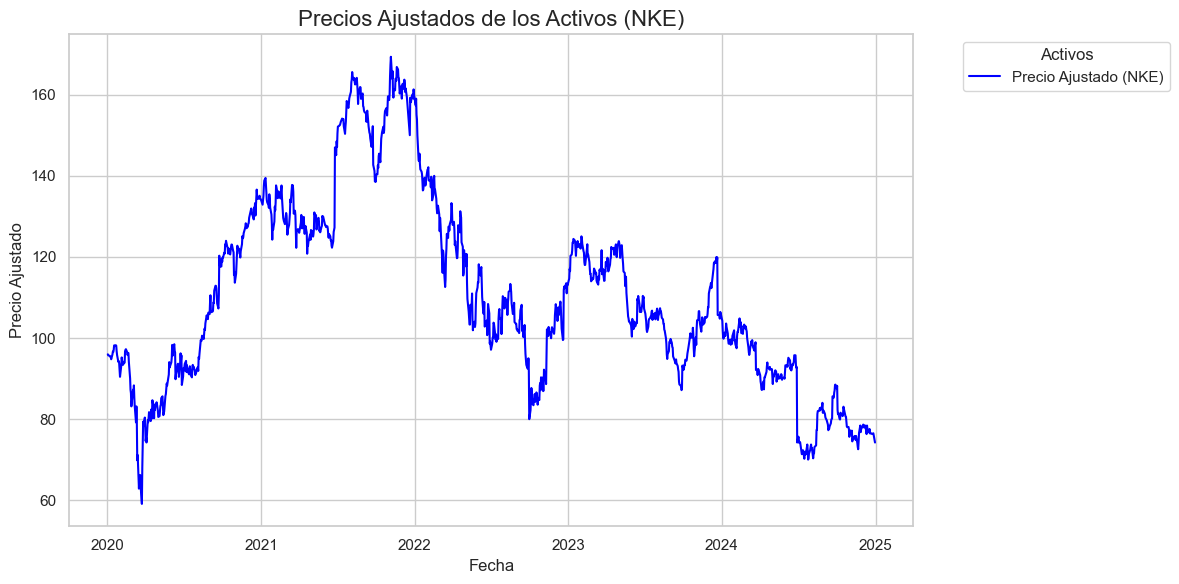

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_Adj_close['NKE'], label="Precio Ajustado (NKE)", color="blue")

# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos (NKE)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,


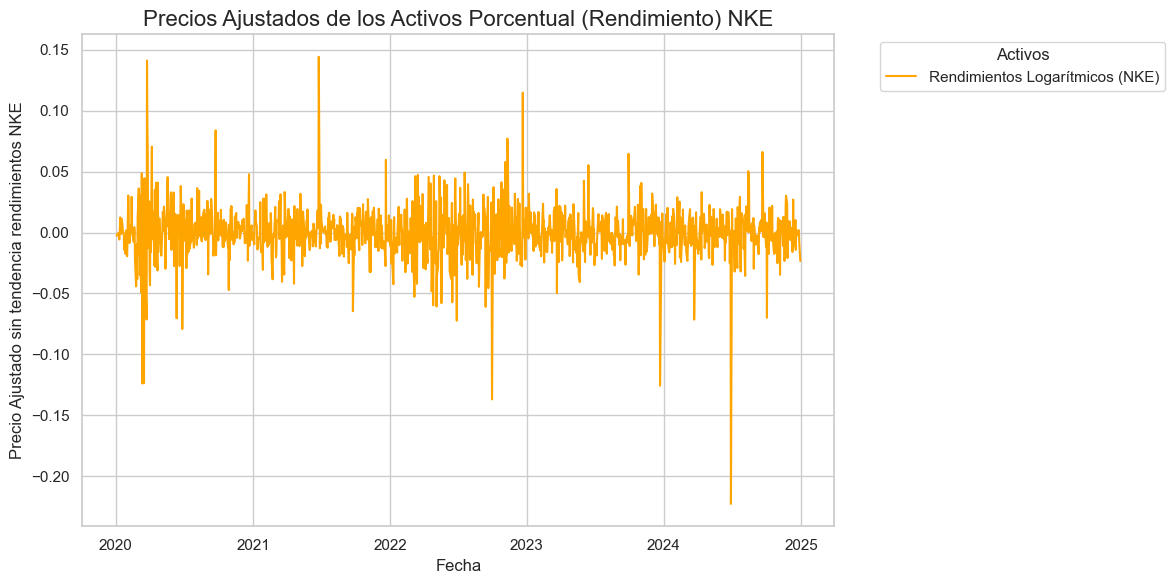

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ret_assets['NKE'], label="Rendimientos Logarítmicos (NKE)", color="orange")


# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos Porcentual (Rendimiento) NKE", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado sin tendencia rendimientos NKE", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [26]:
ret_assets.corr()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Ticker,,,,,,,,,,,,,,,,
SHEL,1.000000,0.786246,0.676497,0.319323,0.152134,0.103646,0.305491,0.344116,0.156181,0.257816,-0.188286,-0.191921,-0.081393,-0.158653,-0.120929,-0.085714
CVX,0.786246,1.000000,0.746966,0.353785,0.193378,0.094336,0.330999,0.358140,0.166303,0.269322,-0.189091,-0.190868,-0.105201,-0.164559,-0.134052,-0.094502
BKR,0.676497,0.746966,1.000000,0.318493,0.141296,0.116757,0.305273,0.345508,0.178655,0.265143,-0.177068,-0.182701,-0.091697,-0.151624,-0.124332,-0.104149
NKE,0.319323,0.353785,0.318493,1.000000,0.272554,0.053989,0.451216,0.349686,0.404269,0.383497,-0.040942,-0.053749,-0.008267,-0.026251,-0.008061,0.013307
SAM,0.152134,0.193378,0.141296,0.272554,1.000000,0.069390,0.290180,0.174464,0.322224,0.274143,-0.002739,-0.020432,-0.022265,0.011572,0.034449,0.047153
FORD,0.103646,0.094336,0.116757,0.053989,0.069390,1.000000,0.149632,0.079200,0.149672,0.119460,0.002348,-0.000938,0.041703,0.004640,0.013079,0.025961
GOOG,0.305491,0.330999,0.305273,0.451216,0.290180,0.149632,1.000000,0.399947,0.653005,0.516156,-0.041045,-0.068863,-0.001942,-0.015943,0.016167,0.050181
DELL,0.344116,0.358140,0.345508,0.349686,0.174464,0.079200,0.399947,1.000000,0.371159,0.504757,-0.118112,-0.104370,-0.057525,-0.087815,-0.074385,-0.056677
AMZN,0.156181,0.166303,0.178655,0.404269,0.322224,0.149672,0.653005,0.371159,1.000000,0.543533,0.021741,-0.000035,0.029497,0.046970,0.069881,0.086491


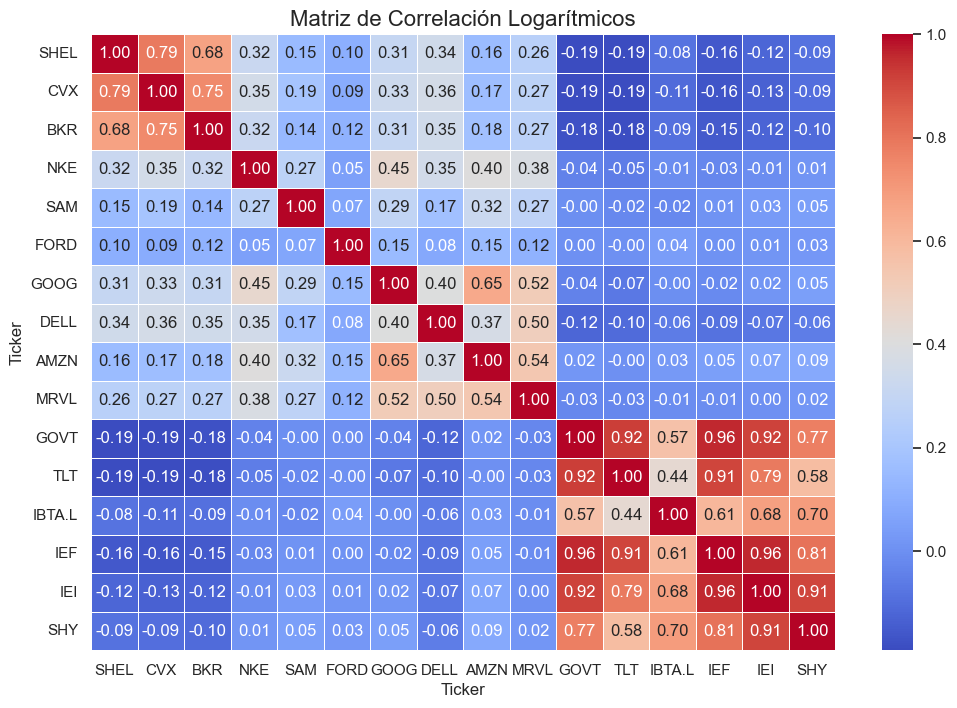

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = ret_assets.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Matriz de Correlación Logarítmicos", fontsize=16)
plt.show()

Explicación:
ret_assets.corr(): Calcula la matriz de correlación entre los rendimientos logarítmicos de los activos.
sns.heatmap(): Crea un mapa de calor para visualizar la matriz de correlación.
annot=True: Muestra los valores numéricos en cada celda.
cmap="coolwarm": Define el esquema de colores.
fmt=".2f": Formato de los números (2 decimales).
linewidths=0.5: Define el grosor de las líneas entre celdas.
plt.figure(figsize=(12, 8)): Ajusta el tamaño del gráfico.
Este código generará un mapa de calor que muestra las correlaciones entre los rendimientos logarítmicos de los activos. ¿Te gustaría personalizar algo más?

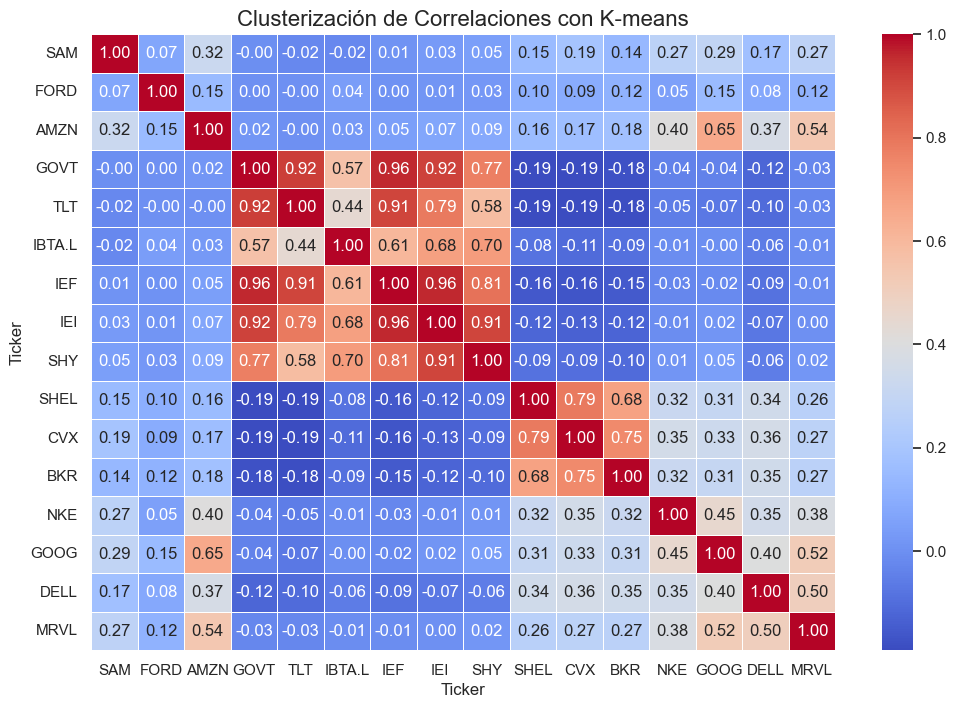

In [28]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = ret_assets.corr()

# Convertir la matriz de correlación en un array para K-means
correlation_array = correlation_matrix.values

# Aplicar K-means
n_clusters = 3  # Número de clusters deseados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(correlation_array)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Reordenar la matriz de correlación según los clusters
sorted_indices = np.argsort(labels)
sorted_correlation_matrix = correlation_matrix.iloc[sorted_indices, sorted_indices]

# Visualizar la matriz de correlación reordenada
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Clusterización de Correlaciones con K-means", fontsize=16)
plt.show()

CHECAMOS LAS ESTADISTICAS 

Donde mean = PRomedio diario del rendimiento
std= Es el riesgo diario del activo



In [29]:
ret_assets.describe()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1286.000000
mean,0.000177,0.000300,0.000480,-0.000200,-0.000170,-0.000539,0.000809,0.001194,0.000658,0.001111,-0.000030,-0.000247,0.000052,-0.000059,7.229849e-07,0.000048
std,0.023199,0.022246,0.027619,0.021739,0.028565,0.045230,0.020069,0.027238,0.022263,0.033633,0.003861,0.011096,0.001294,0.004914,2.903740e-03,0.001185
min,-0.188406,-0.250062,-0.251848,-0.222905,-0.301361,-0.314493,-0.117667,-0.196833,-0.151398,-0.158169,-0.022498,-0.069011,-0.007505,-0.025392,-1.124563e-02,-0.005101
25%,-0.010087,-0.009029,-0.013448,-0.009915,-0.012584,-0.020397,-0.009197,-0.010614,-0.010785,-0.017004,-0.002235,-0.007223,-0.000536,-0.002948,-1.425734e-03,-0.000464
50%,0.000221,0.000713,0.000414,-0.000081,0.000029,0.000000,0.002029,0.000696,0.000749,0.000729,0.000000,-0.000207,0.000000,-0.000086,0.000000e+00,0.000000
75%,0.010569,0.009592,0.013707,0.010467,0.011646,0.016837,0.011010,0.013971,0.012604,0.018757,0.002192,0.006087,0.000555,0.002588,1.338367e-03,0.000470
max,0.179647,0.204904,0.187133,0.144372,0.228351,0.429925,0.094994,0.274737,0.126949,0.280836,0.022325,0.072502,0.012074,0.026074,1.427650e-02,0.009925


In [30]:
ret_assets['SHY'].describe()

count    1286.000000
mean        0.000048
std         0.001185
min        -0.005101
25%        -0.000464
50%         0.000000
75%         0.000470
max         0.009925
Name: SHY, dtype: float64

1.-plt.hist(): Crea el histograma. El parámetro density=True normaliza el histograma para que represente una densidad de probabilidad.

2.-np.linspace(): Genera puntos equidistantes entre el mínimo y el máximo de los datos para la curva normal.

3.-norm.pdf(): Calcula la función de densidad de probabilidad (PDF) de una distribución normal con la media y desviación estándar de los datos.

4.-plt.plot(): Superpone la curva normal sobre el histograma.

5.-Personalización: Se agregan etiquetas, título y leyenda para mejorar la presentación.

# HISTOGRAMA
Un histograma es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

Divides los tamaños en grupos (por ejemplo, pequeños, medianos y grandes).
Cuentas cuántos dulces hay en cada grupo.
Dibujas una barra para cada grupo:
La barra es más alta si hay muchos dulces en ese grupo.
La barra es más baja si hay pocos dulces.
El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

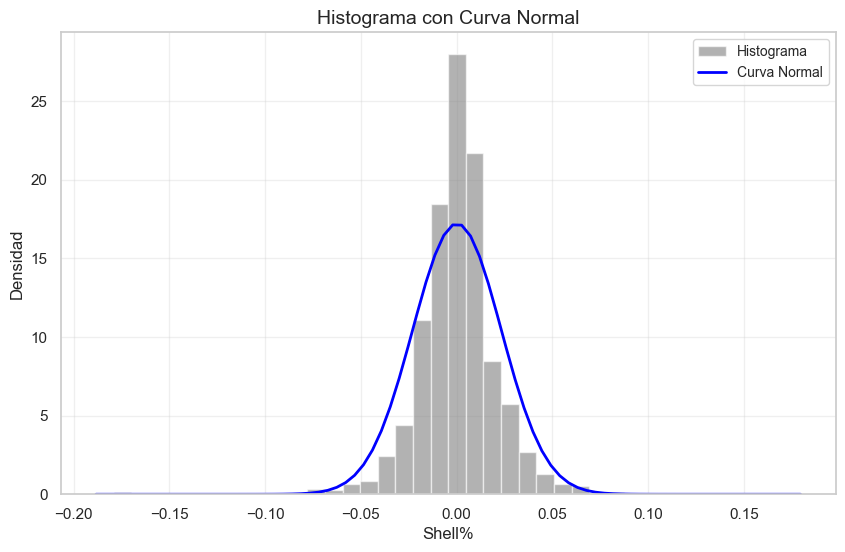

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Crear el histograma
plt.figure(figsize=(10, 6))
hist_shell = plt.hist(shell_data, bins=40, density=True, alpha=0.6, color='gray', label='Histograma')

# Generar la curva normal
xfit = np.linspace(min(shell_data), max(shell_data), 80)
yfit = norm.pdf(xfit, loc=np.mean(shell_data), scale=np.std(shell_data))
plt.plot(xfit, yfit, color='blue', linewidth=2, label='Curva Normal')

# Personalizar el gráfico
plt.title("Histograma con Curva Normal", fontsize=14)
plt.xlabel("Shell%", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Análisis de series de tiempo

Pruebas de normalidad: Lilliefors
Pruebas en Shell

# Lilliefors prueba

Imagina que tienes una gran bolsa llena de canicas de muchos colores. Ahora, tú quieres saber si el color de las canicas está muy bien repartido de manera que sigan un patrón bonito, como cuando acomodas las canicas formando un arcoíris.

La prueba de Lilliefors es como un juego en el que miramos cómo están acomodadas las canicas y nos preguntamos:
"¿Esto parece un arcoíris perfecto, o están un poco desordenadas?"

En vez de colores, en la vida real usamos números (como la altura de las personas, las calificaciones de un examen, etc.). Y en vez de buscar un arcoíris, queremos saber si esos números siguen una forma especial llamada campana de Gauss o distribución normal (que es como una montañita simétrica, igual de alta de un lado que del otro).

Entonces, la prueba de Lilliefors hace esto:

Mira los números que tienes.

Calcula la campana que mejor se ajusta a esos números.

Compara tus números con esa campana.

Decide si tus números están suficientemente cerca de la forma de la campana o si están muy desordenados.

Si están cerca, decimos:
✅ "¡Sí, tus números parecen seguir una distribución normal!"

Si están muy diferentes, decimos:
❌ "No, tus números no siguen una distribución normal."

# Otra explicacion sencilla de Lilliefors 

Imagina que ahora tú eres un pequeño granjero y tienes que vender manzanas 🍎. Cada día, mides el peso de tus manzanas, porque quieres saber si tus manzanas son casi todas del mismo tamaño o si hay algunas muy raras (unas gigantes o unas muy chiquitas).

Ahora:

Si casi todas las manzanas pesan parecido y siguen una forma bonita (como la campana 🎯), es fácil predecir cuánto vas a ganar vendiéndolas.

Pero si pesan muy diferente, es difícil saber cuánto dinero vas a hacer.

Entonces, la prueba de Lilliefors ayuda a revisar si los pesos de tus manzanas se comportan de manera "normal" (siguiendo la famosa campana) o no.

En el mundo de las acciones 📈 funciona igual:

Cada acción (como una empresa de zapatos, tecnología o refrescos) sube y baja de precio todos los días.

Los inversionistas quieren saber si esos cambios son normales o muy locos.

Si siguen una forma normal (campana), entonces es más seguro hacer planes: saber si una acción es tranquila o muy volátil (loca).

Si no, hay más riesgo de perder dinero o ganar mucho de repente.

¿Por qué es importante?
Porque si sabes que los precios de una acción se comportan normal, puedes:

Calcular riesgos mejor. 🎯

Invertir de manera más inteligente. 🧠

Tomar mejores decisiones sobre dónde poner tu dinero. 💰

Si no revisas esto, sería como vender manzanas sin saber si son normales o raras... ¡y podrías perder mucho!

# APLICAMOS LA LILLIEFORS A SHEL

In [33]:
# APLICAMOS LA LILLIEFORS A SHEL

from statsmodels.stats.diagnostic import lilliefors

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Realizar la prueba de Lilliefors
stat, p_value = lilliefors(shell_data)

# Mostrar los resultados
print(f"Estadístico de Lilliefors: {stat}")
print(f"Valor p: {p_value}")

# Interpretación


if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: Los datos podrían seguir una distribución normal.")
    

#La hipotesis nula H0: los rendimientos se distribuyen como una Normal.
#La hipotesis alterna H1: los rendimientos NO se distribuyen como una Normal.

#Interpretación: si el p-value es mayor que 0.05 entonces NO se rechaza la H0; 
# si el p-value es menor que 0.05 entonces se rechaza la H0.
#Los rendimientos de SHELL no se distribuyen como una Normal.




Estadístico de Lilliefors: 0.09787231676009855
Valor p: 0.0009999999999998899
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


# Lilliefors funcion

lilliefors(shell_data):

Es una función de la biblioteca statsmodels que realiza la prueba de Lilliefors.
La prueba de Lilliefors es una versión modificada de la prueba de Kolmogorov-Smirnov que verifica si los datos siguen una distribución normal.
shell_data es el conjunto de datos que se está evaluando (en este caso, los rendimientos de Shell).

stat:

Es el estadístico de la prueba. Representa la distancia máxima entre la distribución acumulativa empírica de los datos y la distribución acumulativa teórica (normal).
Un valor más alto indica una mayor desviación de la normalidad.

p_value:

Es el valor p asociado a la prueba.
Si p_value < 0.05, se rechaza la hipótesis nula (los datos no siguen una distribución normal).
Si p_value >= 0.05, no se puede rechazar la hipótesis nula (los datos podrían seguir una distribución normal).


# APLICAMOS LILLIEFORS A FORD

In [34]:
# APLICAMOS LA LILLIEFORS A SHEL

from statsmodels.stats.diagnostic import lilliefors

# Datos de ejemplo (reemplaza con tus datos reales)
ford_data = ret_assets['FORD']  # Columna de datos de Shell

# Realizar la prueba de Lilliefors
stat, p_value = lilliefors(ford_data)

# Mostrar los resultados
print(f"Estadístico de Lilliefors: {stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: Los datos podrían seguir una distribución normal.")


Estadístico de Lilliefors: 0.11475074439575805
Valor p: 0.0009999999999998899
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


# PRUEBA DE ESTACIONARIEDAD - Dickey Fuller
Pruebas en Shell
La prueba se realiza sobre los rendimientos logarítmicos



Imagina que tienes un trenecito de juguete 🚂 que se mueve por una pista.

A veces el tren avanza derechito, como si nada cambiara mucho.

A veces el tren se vuelve loco: sube, baja, da vueltas, se cae...

Cuando estamos trabajando con series de datos (como los precios de una acción en la bolsa 📈 cada día), queremos saber:
👉 ¿Nuestro tren (los datos) va derechito o se vuelve loco?

La prueba de Dickey-Fuller es un juego para revisar eso:

Si el tren va más o menos derecho, aunque suba y baje un poquito, decimos que es estacionario (¡bien! ✅).

Si el tren se va para cualquier lado sin control, decimos que no es estacionario (¡cuidado! ❌).

¿Qué significa "estacionario"?
Que los datos no cambian mucho su comportamiento con el tiempo.
Por ejemplo:

La media (el "promedio") se mantiene más o menos igual.

La varianza (qué tanto se separan los datos) también es parecida todo el tiempo.

¿Y por qué importa?
Porque cuando los datos son estacionarios, podemos predecir mejor qué va a pasar mañana.
Pero si no son estacionarios, es como tratar de adivinar dónde va a saltar un conejo 🐇... ¡muy difícil!

Entonces la prueba de Dickey-Fuller hace esto:

Mira tus datos (como el precio de una acción).

Pregunta: "¿Se comportan de manera tranquila (estacionaria) o están muy locos (no estacionaria)?"

Te da una respuesta para saber si puedes usar modelos matemáticos normales o necesitas hacer arreglos especiales.

In [35]:
from statsmodels.tsa.stattools import adfuller

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Realizar la prueba de Dickey-Fuller
adf_result = adfuller(shell_data, autolag='AIC')

# Mostrar los resultados
print("Estadístico de prueba ADF:", adf_result[0])
print("Valor p:", adf_result[1])
print("Número de rezagos utilizados:", adf_result[2])
print("Número de observaciones:", adf_result[3])
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretación
if adf_result[1] < 0.05:
    print("Rechazamos la hipótesis nula: La serie es estacionaria.")
else:
    print("No se rechaza la hipótesis nula: La serie no es estacionaria.")

Estadístico de prueba ADF: -12.618291627544176
Valor p: 1.5988496482713296e-23
Número de rezagos utilizados: 7
Número de observaciones: 1278
Valores críticos:
   1%: -3.4354771386691763
   5%: -2.8638041921002126
   10%: -2.5679754757164095
Rechazamos la hipótesis nula: La serie es estacionaria.


adfuller(shell_data):

Realiza la prueba de Dickey-Fuller aumentada para verificar si una serie temporal es estacionaria.
La hipótesis nula (H0) es que la serie no es estacionaria (tiene una raíz unitaria).
Si el valor p (adf_result[1]) es menor a 0.05, se rechaza H0, indicando que la serie es estacionaria.
Resultados devueltos por adfuller:

adf_result[0]: Estadístico de la prueba ADF.
adf_result[1]: Valor p.
adf_result[2]: Número de rezagos utilizados en la prueba.
adf_result[3]: Número de observaciones utilizadas.
adf_result[4]: Valores críticos para diferentes niveles de significancia (1%, 5%, 10%).
Interpretación:

Si el valor p es menor a 0.05, la serie es estacionaria.
Si el valor p es mayor o igual a 0.05, la serie no es estacionaria.

1. "Test regression none"
👶 Esto te dice:
"Hice la prueba sin poner constantes ni pendientes" (como tú lo pediste en type = "none").

2. "Coefficients"
👶 Aquí ves cuánto "empujan" los datos hacia la media:

Estimate (-0.09543):
Te dice cuánto tus datos tratan de regresar hacia el centro (cero).
Negativo es buena señal si quieres estacionariedad.

Std. Error:
Es el "error" que puede tener esa estimación.

t value:
Es como decir "qué tan fuerte es la prueba".
Más negativo ➔ mejor para encontrar estacionariedad.

Pr(>|t|):
Es el p-valor.

Si es muy chiquito (por ejemplo menos de 0.05), ganas y puedes decir:
"¡Los datos son estacionarios!" 🎯

Si es grande (mayor a 0.05), entonces no puedes decir que es estacionario.

3. "Test-statistic o Estadistico de Prueba"
👶 Este numerito (por ejemplo -3.427) es súper importante:

Es el resultado final de la prueba Dickey-Fuller.

Debes compararlo contra los "Valores Criticos".

4. "Valores Criticos"
👶 Estos números (-2.58, -1.95, -1.62) son como líneas de meta 🏁:

Si tu Test-statistic (-3.427) es más pequeño (más negativo) que el critical value de 1%, 5% o 10%...

Ganas y puedes decir que los datos son estacionarios ✅.

Resumen del ejemplo:
Test-statistic = -3.427

Critical value para 5% = -1.95

-3.427 < -1.95, entonces:
✅ ¡Tus datos son estacionarios!

¡Bieeen! 🎉

Así que el proceso es:

Miras el Test-statistic.

Lo comparas con los critical values.

Si es más chiquito, sí hay estacionariedad.

Si no, no hay estacionariedad.


# EMPEZAMOS CON LA CONSTRUCCION DEL PORTAFOLIO  

Rendimiento y riesgo del portafolio
Rendimiento del portafolio



# PROMEDIO DE RENDIMIENTOS DE CADA UNA DE LAS ACCIONES DIARIAS PORTAFOLIO

In [69]:


portafolio=['SHEL','NKE','FORD','SAM','GOVT']
assets=ret_assets[portafolio]
media_1=assets.mean()
print(media_1['SHEL'])

media_1



0.00017747321736364313


Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64

# VARIANZA DE CADA ACCION (NO TIENE INTERPRETACION)

In [70]:
varianza_1=assets.var()

varianza_1.head()

Ticker
SHEL    0.000538
NKE     0.000473
FORD    0.002046
SAM     0.000816
GOVT    0.000015
dtype: float64

# DESVIACION ESTANDAR (RIESGO DE LA ACCION) DE CADA UNA DE LAS ACCIONES

In [71]:
desviacion_1=assets.std()

desviacion_1.head() #Riesgo diario

desviacion_anual=desviacion_1*((252)**0.5)

desviacion_anual=pd.DataFrame(desviacion_anual, columns=['Riesgo anual del activo'])

desviacion_anual



,Riesgo anual del activo
Ticker,
SHEL,0.368271
NKE,0.345091
FORD,0.718010
SAM,0.453455
GOVT,0.061290


In [72]:
#for i in media_1.index:
#    print(f"El rendimiento medio de {i} es: {media_1[i]}")
    
Exceso=assets.copy()

print('ACCIONES')
print(Exceso.head())

print('PROMEDIOS')
print(media_1.head())


# Mostrar los primeros valores después de la operación
print(Exceso['SHEL'].head())



ACCIONES
Ticker          SHEL       NKE      FORD       SAM      GOVT
Date                                                        
2020-01-03  0.007837 -0.002743 -0.009950 -0.009258  0.004989
2020-01-06  0.012380 -0.000883  0.029559  0.010470 -0.001150
2020-01-07 -0.009229 -0.000491 -0.009756  0.006198 -0.001918
2020-01-08 -0.011825 -0.002263  0.009756 -0.001338 -0.001537
2020-01-09 -0.000168 -0.000689  0.009662 -0.010500  0.000769
PROMEDIOS
Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64
Date
2020-01-03    0.007837
2020-01-06    0.012380
2020-01-07   -0.009229
2020-01-08   -0.011825
2020-01-09   -0.000168
Name: SHEL, dtype: float64


# MEDIA O PREDIO RENDIMIENTO DIARIO DE CADA ACCION

In [73]:
#Promedio del rendimiento de la accion diario
media_1.head()

Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64

In [74]:
Exceso.head()

Ticker,SHEL,NKE,FORD,SAM,GOVT
Date,,,,,
2020-01-03,0.007837,-0.002743,-0.009950,-0.009258,0.004989
2020-01-06,0.012380,-0.000883,0.029559,0.010470,-0.001150
2020-01-07,-0.009229,-0.000491,-0.009756,0.006198,-0.001918
2020-01-08,-0.011825,-0.002263,0.009756,-0.001338,-0.001537
2020-01-09,-0.000168,-0.000689,0.009662,-0.010500,0.000769


# OBTENEMOS LOS EXCESOS

In [75]:
for i in Exceso.columns:
    print(i)
    # Restar el valor a todas las filas de la columna
    Exceso[i]=Exceso[i]-media_1[i] 
    
Exceso.head()
    


SHEL
NKE
FORD
SAM
GOVT


Ticker,SHEL,NKE,FORD,SAM,GOVT
Date,,,,,
2020-01-03,0.007659,-0.002544,-0.009411,-0.009088,0.005019
2020-01-06,0.012202,-0.000684,0.030098,0.010640,-0.001120
2020-01-07,-0.009406,-0.000292,-0.009217,0.006368,-0.001888
2020-01-08,-0.012002,-0.002063,0.010295,-0.001168,-0.001507
2020-01-09,-0.000345,-0.000490,0.010201,-0.010330,0.000799


# CALCULAMOS LA CORRLACION DE LOS ACTIVOS DE PORTAFOLIO DE 5 ACTIVOS


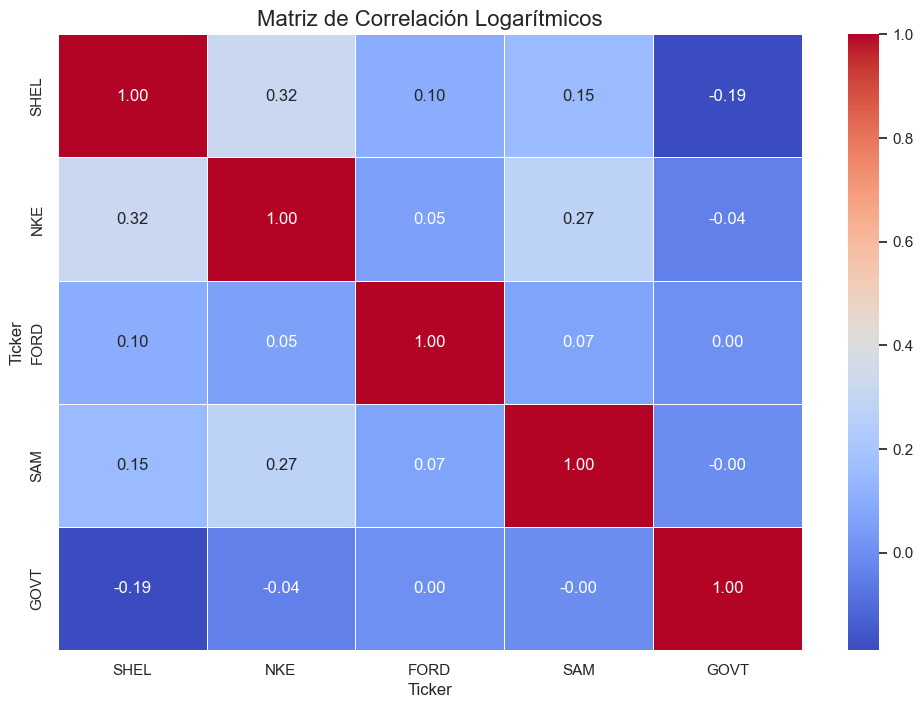

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = assets.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Matriz de Correlación Logarítmicos", fontsize=16)
plt.show()

In [77]:
Numero_de_muestras=assets['SHEL']

PRUEBA=assets['SHEL']

N=len(Numero_de_muestras.values)



# CALCULAMOS LA MATRIZ DE VARIANZA-COVARIANZA DE FORMA DIRECTA


In [78]:
# Calcular la matriz de varianza-covarianza
matriz_varianza_covarianza = assets.cov()

# Mostrar la matriz
print(matriz_varianza_covarianza)

Ticker      SHEL       NKE          FORD           SAM          GOVT
Ticker                                                              
SHEL    0.000538  0.000161  1.087557e-04  1.008153e-04 -1.686467e-05
NKE     0.000161  0.000473  5.308446e-05  1.692465e-04 -3.436337e-06
FORD    0.000109  0.000053  2.045785e-03  8.965180e-05  4.100615e-07
SAM     0.000101  0.000169  8.965180e-05  8.159586e-04 -3.020237e-07
GOVT   -0.000017 -0.000003  4.100615e-07 -3.020237e-07  1.490682e-05


# Generamos un vector de pesos

In [79]:
import numpy as np
#w = np.random.rand(5)
#print(w)
#w=w/np.sum(w)
#print(w)


#Usamos los pesos de R
w=np.array([0.024991001,0.233119809,0.002204297,0.378195880,0.361489013])

w

array([0.024991  , 0.23311981, 0.0022043 , 0.37819588, 0.36148901])

# PARA OBTENER LA DESVIACION ESTANDAR (RIESGO DEL PORTAFOLIO)

La desviación estándar de un portafolio de 
𝑁
N activos es simplemente la raíz cuadrada de la varianza del portafolio.

📌 Fórmula:

𝜎=𝑤⊤*𝛴*𝑤

​
Donde:

σ  desviación estándar del portafolio (riesgo total)

w: vector de pesos 

Σ: matriz de varianza-covarianza de los activos

La desviación estándar se interpreta como la volatilidad o riesgo total del portafolio, considerando tanto el riesgo individual de cada activo como su correlación con los demás.




# RENDIMIENTO Y RIESGO DE PORTAFOLIO

In [80]:

matriz_varianza_covarianza_array=np.array(matriz_varianza_covarianza)

Varianza=np.dot(w.T,np.dot(matriz_varianza_covarianza_array,w))

Desv_port=np.sqrt(Varianza)

print("El riesgo de tu portafolio Diario es de:",Desv_port)

#Calculamos las desviacion estandar (RIESGO) el riesgo anualizado del portafolio


Desv_port_anual=100*(Desv_port*np.sqrt(252))

print("El riesgo de tu portafolio anual es de %",Desv_port_anual)


# Calcular el rendimiento anualizado del portafolio FORMA RAPIDA
rendimiento_portafolio = (np.dot(assets.mean().values, w))*252
print("Rendimiento anualizado del portafolio RAPIDA: %",rendimiento_portafolio*100)


# Calcular el rendimiento anualizado del portafolio FORMA CORRECTA
rendimiento_portafolio_correcta = ((1 + np.dot(assets.mean().values, w)) ** 252) - 1
print("Rendimiento anualizado del portafolio CORRECTA: %",rendimiento_portafolio_correcta*100)




El riesgo de tu portafolio Diario es de: 0.013325148415536368
El riesgo de tu portafolio anual es de % 21.15301733432136
Rendimiento anualizado del portafolio RAPIDA: % -2.985991222278289
Rendimiento anualizado del portafolio CORRECTA: % -2.942022653769616


LINEA 300 R MINUTO 1:40:44

# La Frontera Eficiente
## Construcción de "n" portafolios
Consideramos los siguientes pasos: 

1) número de simulaciones equivalente al número de portafolios por construir; 

2) el objeto en donde guardaremos las "n" proporciones posibles asignadas a cada activo; 

3) el objeto en donde guardaremos los "n" rendimientos posibles del portafolio; 

4) el objeto con las "n" desviaciones estándar del portafolio; 

5) el objeto con los "n" Sharpe Ratios; 

6) finalmente, la simulación.

In [81]:
import numpy as np

# Número de simulaciones
simul = 500

# Crear matrices y vectores para almacenar los resultados
sim_wgts = np.zeros((simul, len(assets.columns)))  # Matriz de pesos
sim_rets = np.zeros(simul)  # Vector para rendimientos
sim_risk = np.zeros(simul)  # Vector para riesgos
sim_sharpe = np.zeros(simul)  # Vector para ratios de Sharpe

sim_wgts


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

simul: Define el número de simulaciones (500 en este caso).

sim_wgts: Matriz de pesos con simul filas y tantas columnas como activos en assets.columns.

sim_rets: Vector para almacenar los rendimientos simulados.

sim_risk: Vector para almacenar los riesgos simulados.

sim_sharpe: Vector para almacenar los ratios de Sharpe simulados.

# Creamos la simulación a través de un ciclo FOR-NEXT:

In [82]:
FORD_pro=assets['FORD'].mean()
GOVT_pro=assets['GOVT'].mean()
SHEL_pro=assets['SHEL'].mean()
NKE_pro=assets['NKE'].mean()
SAM_pro=assets['SAM'].mean()

In [83]:
# assets.mean().values: vector de medias
# assets.cov().values: matriz de covarianza

for i in range(simul):
    # Pesos aleatorios normalizados
    wgts = np.random.random(len(assets.columns)) #Genera un vector de números aleatorios (uno por cada activo del portafolio).
    wgts = wgts / np.sum(wgts) #Normaliza los pesos para que la suma total sea 1 (100% del capital invertido).
    sim_wgts[i, :] = wgts #Guarda los pesos generados un vector en la fila i en la matriz sim_wgts en la fila correspondiente a la simulación actual.

    # Rendimiento anualizado del portafolio
    port_ret = np.dot(wgts, assets.mean().values) * 252 # Calcula el rendimiento anualizado del portafolio:
    #assets.mean().values es el vector de rendimientos promedio diarios de cada activo.
    #p.dot(wgts, ...) multiplica cada peso por el rendimiento medio y suma el resultado.
    #Multiplica por 252 para anualizar (252 días hábiles al año).
    
    sim_rets[i] = port_ret #Guarda el rendimiento anualizado en el vector de rendimientos simulados.


    ## Riesgo anualizado del portafolio
    port_sd = np.sqrt(np.dot(wgts.T, np.dot(assets.cov().values * 252, wgts)))#Calcula el riesgo anualizado (desviación estándar) del portafolio:
    sim_risk[i] = port_sd #assets.cov().values es la matriz de covarianza diaria.
    #Se multiplica por 252 para anualizar la covarianza.
    #El producto matricial calcula la varianza del portafolio, y la raíz cuadrada da la desviación estándar.

    # Sharpe Ratio
    sr = port_ret / port_sd
    sim_sharpe[i] = sr #Guarda el ratio de Sharpe en el vector correspondiente.


¿Qué hace esta línea?
sim_wgts es una matriz de NumPy (un arreglo bidimensional) donde cada fila guarda los pesos de los activos para una simulación diferente.
i es el índice de la simulación actual (por ejemplo, la simulación número 0, 1, 2, ..., 499).
: significa "todas las columnas" de esa fila.
wgts es un vector (arreglo de NumPy) que contiene los pesos aleatorios generados para los activos en esa simulación.
¿Qué ocurre exactamente?
Se asignan los pesos generados en wgts a la fila i de la matriz sim_wgts.
Así, después de todas las simulaciones, cada fila de sim_wgts tendrá los pesos de una simulación distinta.
Ejemplo visual
Supón que tienes 3 activos y 2 simulaciones:

sim_wgts empieza así (2 filas, 3 columnas):
   Activo 1	Activo 2 Activo 3
Sim1	0	0	0
Sim2	0	0	0
En la primera simulación (i=0), generas wgts = [0.2, 0.5, 0.3]
Al ejecutar sim_wgts[0, :] = wgts, la matriz queda:
  Activo 1	Activo 2 Activo 3
Sim1	0.2	0.5	0.3
Sim2	0	0	0
En la segunda simulación (i=1), generas wgts = [0.4, 0.1, 0.5]
Al ejecutar sim_wgts[1, :] = wgts, la matriz queda:
Activo 1	Activo 2	Activo 3
Sim1	0.2	0.5	0.3
Sim2	0.4	0.1	0.5
Así, al final, tienes todos los portafolios simulados guardados en la matriz sim_wgts.

In [84]:
sim_wgts

array([[0.20753092, 0.20712751, 0.19521154, 0.14681959, 0.24331044],
       [0.6004935 , 0.18958915, 0.07416751, 0.08827015, 0.04747969],
       [0.13418399, 0.20343763, 0.21521182, 0.10368337, 0.34348318],
       ...,
       [0.04212043, 0.11120492, 0.18315371, 0.48994752, 0.17357342],
       [0.35957163, 0.11603099, 0.00823649, 0.36206721, 0.15409368],
       [0.262433  , 0.36687771, 0.08139512, 0.22220933, 0.06708485]])

In [85]:
valores_portafolio=pd.DataFrame({'Rendimiento': sim_rets, 'Riesgo': sim_risk, 'Sharpe Ratio': sim_sharpe})

valores_portafolio

,Rendimiento,Riesgo,Sharpe Ratio
0,-0.035786,0.216719,-0.165124
1,0.003103,0.271750,0.011420
2,-0.040503,0.204654,-0.197911
3,0.003019,0.272164,0.011093
4,-0.021768,0.239323,-0.090955
...,...,...,...
495,-0.032424,0.224899,-0.144171
496,-0.029273,0.249956,-0.117114
497,-0.050916,0.281915,-0.180606
498,-0.007569,0.244163,-0.031000


In [86]:
valores_portafolio['Rendimiento'].max()


0.016377565592612404

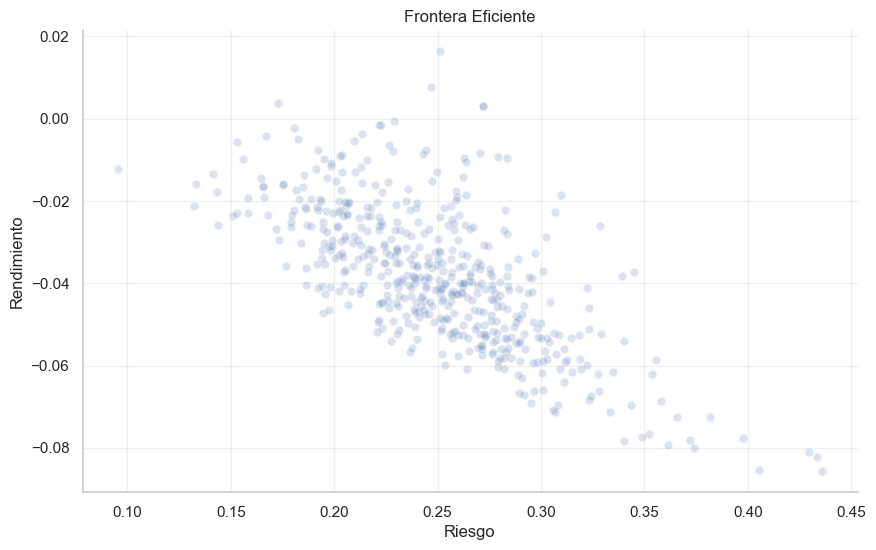

In [87]:
# portafolio es tu DataFrame con las columnas 'Riesgo' y 'Rendimiento'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valores_portafolio, x='Riesgo', y='Rendimiento', alpha=0.2)

plt.title('Frontera Eficiente')
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.grid(True, alpha=0.3)
sns.despine()
plt.show()

In [88]:
print("Mayor Rendimiento del portafolio %",(valores_portafolio['Rendimiento'].max())*100)

print("Menor riesgo del portafolio %",(valores_portafolio['Riesgo'].min())*100)



Mayor Rendimiento del portafolio % 1.6377565592612404
Menor riesgo del portafolio % 9.532970044289659


In [89]:
portafolio

['SHEL', 'NKE', 'FORD', 'SAM', 'GOVT']

In [90]:
#Asignamos los headers del portafolio ['SHEL', 'NKE', 'FORD', 'SAM', 'GOVT']
sim_wgts1=pd.DataFrame(sim_wgts, columns=portafolio)

sim_wgts1

,SHEL,NKE,FORD,SAM,GOVT
0,0.207531,0.207128,0.195212,0.146820,0.243310
1,0.600493,0.189589,0.074168,0.088270,0.047480
2,0.134184,0.203438,0.215212,0.103683,0.343483
3,0.577411,0.000204,0.079253,0.267001,0.076131
4,0.281492,0.293066,0.051629,0.276800,0.097014
...,...,...,...,...,...
495,0.226156,0.299840,0.133321,0.191787,0.148896
496,0.183949,0.273438,0.048332,0.380571,0.113710
497,0.042120,0.111205,0.183154,0.489948,0.173573
498,0.359572,0.116031,0.008236,0.362067,0.154094


In [91]:
#Juntamos los pesos con valores del portafolio

all_portafolios=pd.concat([sim_wgts1,valores_portafolio], axis=1)

all_portafolios




,SHEL,NKE,FORD,SAM,GOVT,Rendimiento,Riesgo,Sharpe Ratio
0,0.207531,0.207128,0.195212,0.146820,0.243310,-0.035786,0.216719,-0.165124
1,0.600493,0.189589,0.074168,0.088270,0.047480,0.003103,0.271750,0.011420
2,0.134184,0.203438,0.215212,0.103683,0.343483,-0.040503,0.204654,-0.197911
3,0.577411,0.000204,0.079253,0.267001,0.076131,0.003019,0.272164,0.011093
4,0.281492,0.293066,0.051629,0.276800,0.097014,-0.021768,0.239323,-0.090955
...,...,...,...,...,...,...,...,...
495,0.226156,0.299840,0.133321,0.191787,0.148896,-0.032424,0.224899,-0.144171
496,0.183949,0.273438,0.048332,0.380571,0.113710,-0.029273,0.249956,-0.117114
497,0.042120,0.111205,0.183154,0.489948,0.173573,-0.050916,0.281915,-0.180606
498,0.359572,0.116031,0.008236,0.362067,0.154094,-0.007569,0.244163,-0.031000


In [92]:
#PARA COMPROBAR QUE ES EL RENDIMIENTO DE LOS PESOS PARA EL INDEX 0
(SHEL_pro*(all_portafolios['SHEL'][0])\
+NKE_pro*(all_portafolios['NKE'][0])\
+FORD_pro*(all_portafolios['FORD'][0])\
+SAM_pro*(all_portafolios['SAM'][0])\
+GOVT_pro*(all_portafolios['GOVT'][0]))*252

-0.035785608717857804

# MINUTO 2:15

# AHORA BUSCAMOS LOS VALORES DE MINIMA VARIANZA CON EL MENOR VALOR DE LA DESVIACIÓN ESTÁNDAR (RIESGO) Y MAYOR RENDIMIENTO DEL PORTAFOLIO

In [93]:
all_portafolios

,SHEL,NKE,FORD,SAM,GOVT,Rendimiento,Riesgo,Sharpe Ratio
0,0.207531,0.207128,0.195212,0.146820,0.243310,-0.035786,0.216719,-0.165124
1,0.600493,0.189589,0.074168,0.088270,0.047480,0.003103,0.271750,0.011420
2,0.134184,0.203438,0.215212,0.103683,0.343483,-0.040503,0.204654,-0.197911
3,0.577411,0.000204,0.079253,0.267001,0.076131,0.003019,0.272164,0.011093
4,0.281492,0.293066,0.051629,0.276800,0.097014,-0.021768,0.239323,-0.090955
...,...,...,...,...,...,...,...,...
495,0.226156,0.299840,0.133321,0.191787,0.148896,-0.032424,0.224899,-0.144171
496,0.183949,0.273438,0.048332,0.380571,0.113710,-0.029273,0.249956,-0.117114
497,0.042120,0.111205,0.183154,0.489948,0.173573,-0.050916,0.281915,-0.180606
498,0.359572,0.116031,0.008236,0.362067,0.154094,-0.007569,0.244163,-0.031000


# PORTAFOLIO CON MINIMA VARIANZA ANUAL

In [94]:
minvar_port = all_portafolios.loc[all_portafolios['Riesgo'].idxmin()]

minvar_port

SHEL            0.106935
NKE             0.022260
FORD            0.034380
SAM             0.140433
GOVT            0.695991
Rendimiento    -0.012290
Riesgo          0.095330
Sharpe Ratio   -0.128920
Name: 28, dtype: float64

# PORTAFOLIO CON MAYOR RENDIMIENTO ANUAL

In [95]:
maxret_port = all_portafolios.loc[all_portafolios['Rendimiento'].idxmax()]

#LOS VALORES DE SHEL, NKE, FORD, SAM, GOVT SON LOS PESOS DEL PORTAFOLIO
maxret_port

SHEL            0.628577
NKE             0.122253
FORD            0.020500
SAM             0.030414
GOVT            0.198256
Rendimiento     0.016378
Riesgo          0.251289
Sharpe Ratio    0.065174
Name: 116, dtype: float64

# PORTAFOLIO EN EL MAYOR SHARP RATIO

In [96]:
# Portafolio con el mayor Sharpe Ratio
max_sharpe_port = all_portafolios.loc[all_portafolios['Sharpe Ratio'].idxmax()]

max_sharpe_port

SHEL            0.628577
NKE             0.122253
FORD            0.020500
SAM             0.030414
GOVT            0.198256
Rendimiento     0.016378
Riesgo          0.251289
Sharpe Ratio    0.065174
Name: 116, dtype: float64

# GRAFICAMOS LA FRONTERA DE INVERSION DE LAS SIMULACIONES OPTIMIZACION DE PORTAFOLIO Y FRONTERA EFICIENTE

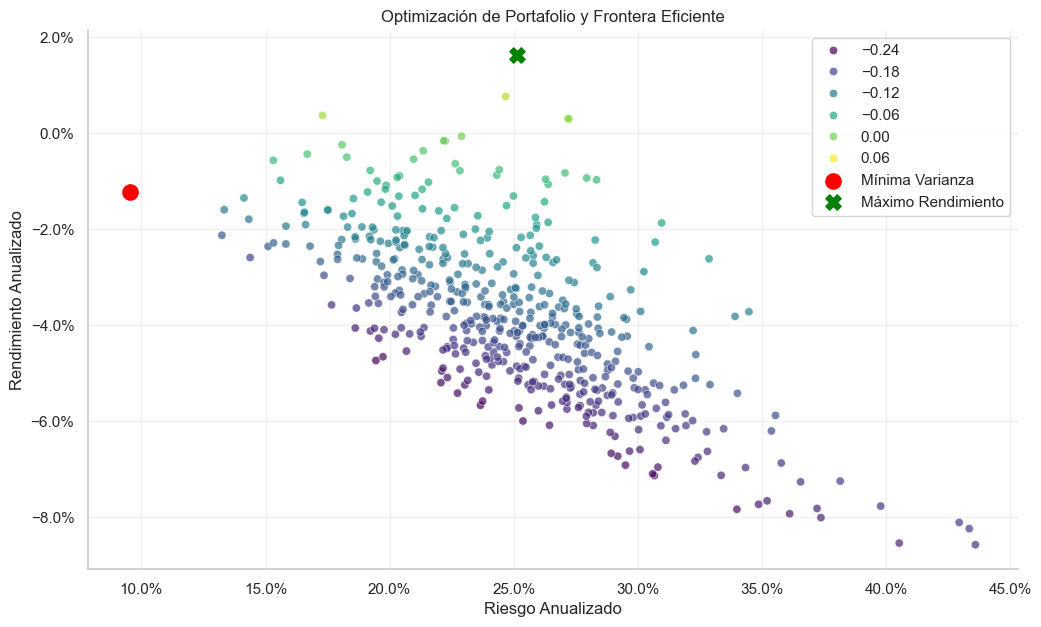

In [123]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Gráfico de dispersión de la frontera eficiente
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=all_portafolios,
    x='Riesgo',
    y='Rendimiento',
    hue='Sharpe Ratio',
    palette='viridis',
    alpha=0.7
)

# Punto de mínima varianza (en rojo)
plt.scatter(
    minvar_port['Riesgo'],
    minvar_port['Rendimiento'],
    color='red',
    s=120,
    label='Mínima Varianza'
)

# Punto de máximo Rendimiento (en rojo)
plt.scatter(
    maxret_port['Riesgo'],
    maxret_port['Rendimiento'],
    color='green',
    marker='X',
    s=120,
    label='Máximo Rendimiento'
)



plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Riesgo Anualizado')
plt.ylabel('Rendimiento Anualizado')
plt.title('Optimización de Portafolio y Frontera Eficiente')
plt.legend()
plt.grid(alpha=0.3)
sns.despine()
plt.show()




In [115]:
import nbformat
print(nbformat.__version__)

5.10.4


# ESTA ES OTRA GRAFICA SE PUEDE IGNORAR

In [122]:
import plotly.express as px

fig = px.scatter(
    all_portafolios,
    x='Riesgo',
    y='Rendimiento',
    color='Sharpe Ratio',
    title='Optimización de Portafolio y Frontera Eficiente',
    labels={'Riesgo': 'Riesgo Anualizado', 'Rendimiento': 'Rendimiento Anualizado'}
)

# Agregar puntos especiales
fig.add_scatter(
    x=[minvar_port['Riesgo']], y=[minvar_port['Rendimiento']],
    mode='markers', marker=dict(color='red', size=12), name='Mínima Varianza'
)
fig.add_scatter(
    x=[max_sharpe_port['Riesgo']], y=[max_sharpe_port['Rendimiento']],
    mode='markers', marker=dict(color='red', size=12, symbol='x'), name='Máximo Sharpe Ratio'
)

fig.update_layout(yaxis_tickformat='.1%', xaxis_tickformat='.1%')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# CONSTRUCCION CON RESTRICCIONES DEL PORTAFOLIO DE DE ACUERDO A LA CONSAR

In [124]:
num_assets=len(portafolio)

# CREAMOS DOS SUBGRUPOS POR RENTA VARIABLE Y RENTA FIJA


# ACTIVOS RENTA VARIABLE

In [132]:
# Selecciona las columnas deseadas del DataFrame ret_assets
variable_select = ["SHEL", "NKE", "FORD", "SAM", "DELL", "AMZN", "MRVL"]
variable_subassets = ret_assets[variable_select]

# ACTIVOS RENTA FIJA

In [134]:

fija_select = ["GOVT","TLT"]
fija_subassets = ret_assets[fija_select]

# CONSTRUCCION DEL PORTAFOLIO

# RESTRICCON DEL PORTAFOLIO 2:32:40 LINEA403

In [144]:
# CONSTRUCCION DEL PORTAFOLIO DE MINIMA VARIANZA

## RESTRICCION DEL PORTAFOLIO

# ...existing code...
import cvxpy as cp
import numpy as np

# Supón que tienes:
# - mu: vector de medias de los activos (media_1 o assets.mean())
# - Sigma: matriz de covarianza (assets.cov().values)
# - n: número de activos (num_assets2)
# - variable_select: lista de índices de renta variable
# - fija_select: lista de índices de renta fija

n = 9
Sigma = ret_assets.cov().values

# Variables de decisión: pesos del portafolio
w = cp.Variable(n)

# Restricción de inversión total (full investment)
constraints = [cp.sum(w) == 1]

# Restricción de caja (box): cada peso entre 0.01 y 0.30
constraints += [w >= 0.01, w <= 0.30]

# Restricción de grupos
# Encuentra los índices de los activos de cada grupo
idx_variable = [variable_subassets.columns.get_loc(col) for col in variable_select]
idx_fija = [fija_subassets.columns.get_loc(col) for col in fija_select]

# Suma de pesos de renta variable entre 0 y 0.40
constraints += [cp.sum(w[idx_variable]) >= 0.00, cp.sum(w[idx_variable]) <= 0.40]
# Suma de pesos de renta fija entre 0 y 0.60
constraints += [cp.sum(w[idx_fija]) >= 0.00, cp.sum(w[idx_fija]) <= 0.60]

# Objetivo: minimizar la varianza (riesgo)
objective = cp.Minimize(cp.quad_form(w, Sigma))

# Definir y resolver el problema
prob = cp.Problem(objective, constraints)
prob.solve()

# Pesos óptimos
w_opt = w.value
print("Pesos óptimos:", w_opt)

Exception: Invalid dimensions for arguments.

Por supuesto, aquí tienes la explicación línea por línea del bloque de optimización de portafolio mínimo de varianza con restricciones usando `cvxpy`:



import cvxpy as cp
import numpy as np
```
Importa las librerías necesarias:  
- `cvxpy` para optimización convexa (resolver problemas de portafolio).
- `numpy` para operaciones numéricas y matrices.

---

```python
n = num_assets  # o num_assets2 si tienes esa variable
Sigma = assets.cov().values
```
- `n` es el número de activos en el portafolio.
- `Sigma` es la matriz de covarianza de los rendimientos de los activos (usada para calcular el riesgo conjunto).

---

```python
w = cp.Variable(n)
```
Define el vector de variables de decisión `w` (los pesos de cada activo en el portafolio).  
Cada elemento de `w` representa el porcentaje invertido en un activo.

---

```python
constraints = [cp.sum(w) == 1]
```
Primera restricción: la suma de todos los pesos debe ser 1 (100% del capital invertido).

---

```python
constraints += [w >= 0.01, w <= 0.30]
```
Restricción de caja:  
- Cada peso debe ser al menos 0.01 (1%) y como máximo 0.30 (30%) del portafolio.

---

```python
idx_variable = [assets.columns.get_loc(col) for col in variable_select]
idx_fija = [assets.columns.get_loc(col) for col in fija_select]
```
Obtiene los índices de las columnas (activos) que corresponden a renta variable (`variable_select`) y renta fija (`fija_select`) dentro del DataFrame `assets`.

---

```python
constraints += [cp.sum(w[idx_variable]) >= 0.00, cp.sum(w[idx_variable]) <= 0.40]
constraints += [cp.sum(w[idx_fija]) >= 0.00, cp.sum(w[idx_fija]) <= 0.60]
```
Restricciones de grupo:
- La suma de los pesos de renta variable debe estar entre 0% y 40% del portafolio.
- La suma de los pesos de renta fija debe estar entre 0% y 60% del portafolio.

---

```python
objective = cp.Minimize(cp.quad_form(w, Sigma))
```
Define el objetivo de la optimización:  
Minimizar la varianza del portafolio (el riesgo total), usando la forma cuadrática `w' * Sigma * w`.

---

```python
prob = cp.Problem(objective, constraints)
prob.solve()
```
- Crea el problema de optimización con el objetivo y las restricciones.
- Lo resuelve usando el solver por defecto de `cvxpy`.

---

```python
w_opt = w.value
print("Pesos óptimos:", w_opt)
```
- Extrae los valores óptimos de los pesos (`w_opt`).
- Imprime los pesos óptimos para cada activo.

---

**Resumen:**  
Este bloque de código construye y resuelve un portafolio de mínima varianza bajo restricciones de inversión total, límites individuales y límites por grupo de activos (renta variable y renta fija).import cvxpy as cp
import numpy as np
```
Importa las librerías necesarias:  
- `cvxpy` para optimización convexa (resolver problemas de portafolio).
- `numpy` para operaciones numéricas y matrices.

---

```python
n = num_assets  # o num_assets2 si tienes esa variable
Sigma = assets.cov().values
```
- `n` es el número de activos en el portafolio.
- `Sigma` es la matriz de covarianza de los rendimientos de los activos (usada para calcular el riesgo conjunto).

---

```python
w = cp.Variable(n)
```
Define el vector de variables de decisión `w` (los pesos de cada activo en el portafolio).  
Cada elemento de `w` representa el porcentaje invertido en un activo.

---

```python
constraints = [cp.sum(w) == 1]
```
Primera restricción: la suma de todos los pesos debe ser 1 (100% del capital invertido).

---

```python
constraints += [w >= 0.01, w <= 0.30]
```
Restricción de caja:  
- Cada peso debe ser al menos 0.01 (1%) y como máximo 0.30 (30%) del portafolio.

---

```python
idx_variable = [assets.columns.get_loc(col) for col in variable_select]
idx_fija = [assets.columns.get_loc(col) for col in fija_select]
```
Obtiene los índices de las columnas (activos) que corresponden a renta variable (`variable_select`) y renta fija (`fija_select`) dentro del DataFrame `assets`.

---

```python
constraints += [cp.sum(w[idx_variable]) >= 0.00, cp.sum(w[idx_variable]) <= 0.40]
constraints += [cp.sum(w[idx_fija]) >= 0.00, cp.sum(w[idx_fija]) <= 0.60]
```
Restricciones de grupo:
- La suma de los pesos de renta variable debe estar entre 0% y 40% del portafolio.
- La suma de los pesos de renta fija debe estar entre 0% y 60% del portafolio.

---

```python
objective = cp.Minimize(cp.quad_form(w, Sigma))
```
Define el objetivo de la optimización:  
Minimizar la varianza del portafolio (el riesgo total), usando la forma cuadrática `w' * Sigma * w`.

---

```python
prob = cp.Problem(objective, constraints)
prob.solve()
```
- Crea el problema de optimización con el objetivo y las restricciones.
- Lo resuelve usando el solver por defecto de `cvxpy`.

---

```python
w_opt = w.value
print("Pesos óptimos:", w_opt)
```
- Extrae los valores óptimos de los pesos (`w_opt`).
- Imprime los pesos óptimos para cada activo.

---

**Resumen:**  
Este bloque de código construye y resuelve un portafolio de mínima varianza bajo restricciones de inversión total, límites individuales y límites por grupo de activos (renta variable y renta fija).